# DATOS PROPORCIONADOS POR PELAYO ARBUÉS

In [2]:
# Importamos las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from utils.milibreria import * 
import re
# mapas interactivos
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

## Valencia

In [3]:
df = pd.read_csv("data/Valencia Sale.csv", index_col=False)
df

/var/folders/pv/gvnhf98x387cdv8tp25d9wxw0000gn/T/ipykernel_1753/3162117920.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv("data/Valencia Sale.csv", index_col=False)


,Unnamed: 0,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,...,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_BLASCO,LONGITUDE,LATITUDE,geometry
0,1,A9651535568269959084,201812,111000.0,1480.000000,75,2,1,1,1,...,6,0,0,1,3.759093,0.756517,3.373132,-0.393538,39.500908,c(-0.393538331726532
1,2,A13801394133398327300,201812,169000.0,1320.312500,128,4,2,0,1,...,5,0,0,1,2.073773,0.370680,0.540594,-0.359125,39.482599,c(-0.359124975348099
2,3,A8013965313053471366,201812,162000.0,1883.720930,86,2,1,0,1,...,4,0,0,1,2.099641,0.038560,0.719203,-0.362470,39.485144,c(-0.362469934782961
3,4,A15308599866706500727,201812,199000.0,1792.792793,111,4,2,0,1,...,5,0,0,1,2.120917,0.524827,0.915379,-0.367417,39.487445,c(-0.367417112798973
4,5,A7882254711596398998,201812,73000.0,1303.571429,56,3,1,1,1,...,8,0,0,1,3.087950,1.129985,2.009535,-0.370182,39.497057,c(-0.370182227980988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33617,33618,A11108975532973114427,201812,121000.0,1008.333333,120,3,2,0,1,...,5,0,0,1,2.800362,0.710564,2.607601,-0.391340,39.492210,c(-0.391340275756591
33618,33619,A10601844591112299482,201812,136000.0,1619.047619,84,2,1,1,1,...,7,0,0,1,2.282765,0.321158,2.404973,-0.392554,39.486174,c(-0.392554180050313
33619,33620,A4404727404893818740,201812,98000.0,867.256637,113,2,2,1,0,...,7,0,0,1,2.583955,0.661318,2.510628,-0.391909,39.489754,c(-0.391908800157687
33620,33621,A14663195131112920418,201812,45000.0,661.764706,68,3,1,0,0,...,7,0,0,1,3.420772,0.529830,3.305286,-0.398167,39.495606,c(-0.398166615825107


### <b>Significado de las columnas</b>
ASSETID: es el ID del inmueble.

PERIOD: Es el periodo, donde tenemos todos en 2018.

PRICE: hay que ver si es el precio de venta o de anunciado.

UNITPRICE: precio del metro cuadrado.

CONSTRUCTEDAREA: metros cuadrados construidos.

ROOMNUMBER: es el número de habitaciones del inmueble.

BATHNUMBER: número de baños del inmueble. (hay que ver si incluye baños y aseos o solo baños).

HASTERRACE: indica si tiene terraza o no. (ver si tenemos los metros de la terraza)

HASLIFT: indica si tiene ascensor o no.

HASAIRCONDITIONING: indica si tiene aire acondicionado o no.

AMENITYID: son los servicios o características que tiene el edificio, es decir, servicios comunes como zona de coworking, deporte, bicicletas, etc.

HASPARKINGSPACE: indica si tiene plaza de garaje.

ISPARKINGSPACEINCLUDEDINPRICE: indica si la plaza de garaje está incluida en el precio o no.

PARKINGSPACEPRICE: nos indica el precio de la plaza de garaje.

HASNORTHORIENTATION: indica si es orientación norte o no.

HASSOUTHORIENTATION: indica si es orientación sur o no.

HASEASTORIENTATION: indica si es orientación este o no.

HASWESTORIENTATION: indica si es orientación oeste o no.

HASBOXROOM: indica si tiene trastero o no.

HASWARDROBE: indica si tiene armarios o no.

HASSWIMMINGPOOL: indica si tiene piscina o no.

HASDOORMAN: indica si tiene conserje o no.

HASGARDEN: indica si tiene jardín o no.

ISDUPLEX: indica si es un duplex o no.

ISSTUDIO: indica si es un estudio o no.

ISINTOPFLOOR: indica si es ático o no.

CONSTRUCTIONYEAR: indica el año de construcción del inmueble.

FLOORCLEAN: entiendo que indica si está limpio el piso o si el suelo está en buenas condiciones. (COMPROBAR)

FLATLOCATIONID: entiendo que es el ID de la localización del inmueble.

CADCONSTRUCTIONYEAR: CAD es un software para crear diseños. Es la herramienta que se usa para los planos. Nos indica esta columna el año en que se diseñó.

CADMAXBUILDINGFLOOR: Muestra las plantas máximas que tiene el edificio en el diseño.

CADDWELLINGCOUNT: número de viviendas en el plano del edificio.

CADASTRALQUALITYID: calidad de las construcciones en el catastro. (COMPROBAR)

BUILTTYPEID_1: NI IDEA

BUILTTYPEID_2: NI IDEA

BUILTTYPEID_3: NI IDEA

DISTANCE_TO_CITY_CENTER: La distancia hasta el centro de la ciudad. (COMPROBAR LO QUE SE CONSIDERA CENTRO Y LA MEDIDA SI KM O M)

DISTANCE_TO_METRO: La distancia desde el inmueble al metro. (MIRAR AUTOBÚS)

DISTANCE_TO_BLASCO: es la calle principal de Valencia (VER QUE PUNTO COGE DE REFERENCIA DE LA CALLE)

LONGITUDE: la longitud de la localización.

LATITUDE: la latitud de la localización.



## Preprocesamiento de datos

In [4]:
df.columns

Index(['Unnamed: 0', 'ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE',
       'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE', 'HASLIFT',
       'HASAIRCONDITIONING', 'AMENITYID', 'HASPARKINGSPACE',
       'ISPARKINGSPACEINCLUDEDINPRICE', 'PARKINGSPACEPRICE',
       'HASNORTHORIENTATION', 'HASSOUTHORIENTATION', 'HASEASTORIENTATION',
       'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL',
       'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
       'CONSTRUCTIONYEAR', 'FLOORCLEAN', 'FLATLOCATIONID',
       'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
       'CADASTRALQUALITYID', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO', 'DISTANCE_TO_BLASCO',
       'LONGITUDE', 'LATITUDE', 'geometry'],
      dtype='object')

In [5]:
# Hay dos columnas que no vamos a usar, así que las dropeamos.
# 'Unnamed:0' porque se ha generado y no nos interesa y 'geometry' porque nos indica la forma geométrica de la localización y para python no es relevante.
df.drop('Unnamed: 0', axis =1, inplace=True)
df.drop('geometry', axis =1, inplace=True)

#Comprobamos que se haya eliminado correctamente.
df

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,...,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_BLASCO,LONGITUDE,LATITUDE
0,A9651535568269959084,201812,111000.0,1480.000000,75,2,1,1,1,1,...,35,6,0,0,1,3.759093,0.756517,3.373132,-0.393538,39.500908
1,A13801394133398327300,201812,169000.0,1320.312500,128,4,2,0,1,1,...,56,5,0,0,1,2.073773,0.370680,0.540594,-0.359125,39.482599
2,A8013965313053471366,201812,162000.0,1883.720930,86,2,1,0,1,1,...,20,4,0,0,1,2.099641,0.038560,0.719203,-0.362470,39.485144
3,A15308599866706500727,201812,199000.0,1792.792793,111,4,2,0,1,0,...,25,5,0,0,1,2.120917,0.524827,0.915379,-0.367417,39.487445
4,A7882254711596398998,201812,73000.0,1303.571429,56,3,1,1,1,0,...,20,8,0,0,1,3.087950,1.129985,2.009535,-0.370182,39.497057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33617,A11108975532973114427,201812,121000.0,1008.333333,120,3,2,0,1,1,...,13,5,0,0,1,2.800362,0.710564,2.607601,-0.391340,39.492210
33618,A10601844591112299482,201812,136000.0,1619.047619,84,2,1,1,1,1,...,49,7,0,0,1,2.282765,0.321158,2.404973,-0.392554,39.486174
33619,A4404727404893818740,201812,98000.0,867.256637,113,2,2,1,0,0,...,17,7,0,0,1,2.583955,0.661318,2.510628,-0.391909,39.489754
33620,A14663195131112920418,201812,45000.0,661.764706,68,3,1,0,0,0,...,41,7,0,0,1,3.420772,0.529830,3.305286,-0.398167,39.495606


### Valores nulos

In [6]:
# Contamos los valores nulos que tenemos y los ordenamos ya que tenemos muchas columnas.
df.isnull().sum().sort_values(ascending = False)

CONSTRUCTIONYEAR                 13201
FLATLOCATIONID                    5404
FLOORCLEAN                        1730
ASSETID                              0
HASDOORMAN                           0
ISDUPLEX                             0
ISSTUDIO                             0
ISINTOPFLOOR                         0
CADCONSTRUCTIONYEAR                  0
CADMAXBUILDINGFLOOR                  0
CADDWELLINGCOUNT                     0
CADASTRALQUALITYID                   0
BUILTTYPEID_1                        0
BUILTTYPEID_2                        0
BUILTTYPEID_3                        0
DISTANCE_TO_CITY_CENTER              0
DISTANCE_TO_METRO                    0
DISTANCE_TO_BLASCO                   0
LONGITUDE                            0
HASGARDEN                            0
HASSWIMMINGPOOL                      0
PERIOD                               0
HASWARDROBE                          0
PRICE                                0
UNITPRICE                            0
CONSTRUCTEDAREA          

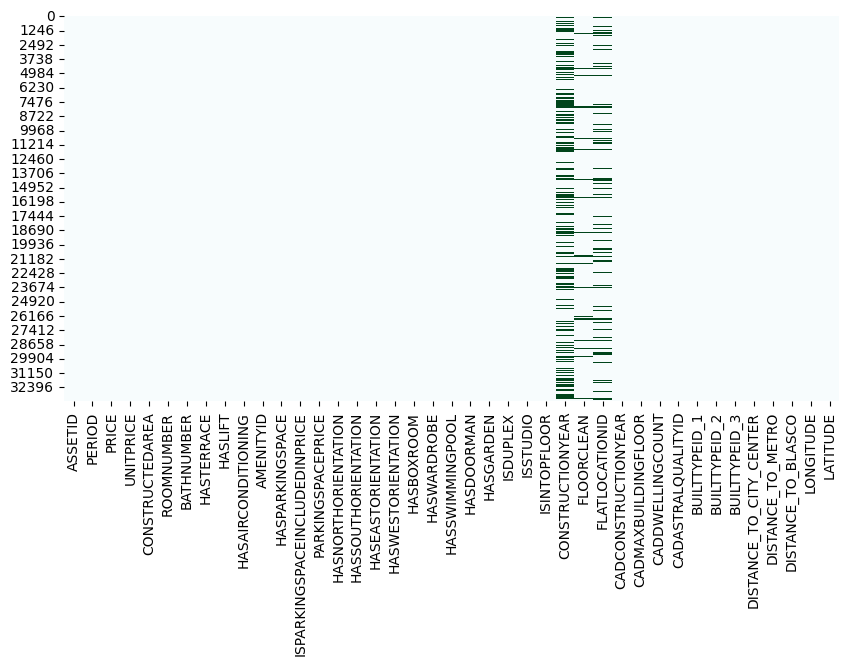

In [7]:
# Tenemos valores nulos en las columnas 'CONSTRUCTIONYEAR', 'FLOORCLEAN' y 'FLATLOCATIONID' pero al tener tantas columnas vamos a representarlo.
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="BuGn")
plt.show()

In [8]:
# Como son muchos valores, mostramos el porcentaje de valores nulos que representan respecto al total.
(df.isnull().sum()/len(df)*100).sort_values(ascending = False)

CONSTRUCTIONYEAR                 39.262983
FLATLOCATIONID                   16.072809
FLOORCLEAN                        5.145440
ASSETID                           0.000000
HASDOORMAN                        0.000000
ISDUPLEX                          0.000000
ISSTUDIO                          0.000000
ISINTOPFLOOR                      0.000000
CADCONSTRUCTIONYEAR               0.000000
CADMAXBUILDINGFLOOR               0.000000
CADDWELLINGCOUNT                  0.000000
CADASTRALQUALITYID                0.000000
BUILTTYPEID_1                     0.000000
BUILTTYPEID_2                     0.000000
BUILTTYPEID_3                     0.000000
DISTANCE_TO_CITY_CENTER           0.000000
DISTANCE_TO_METRO                 0.000000
DISTANCE_TO_BLASCO                0.000000
LONGITUDE                         0.000000
HASGARDEN                         0.000000
HASSWIMMINGPOOL                   0.000000
PERIOD                            0.000000
HASWARDROBE                       0.000000
PRICE      

Tenemos solamente tres columnas con valores nulos:

Floorclean: tan sólo un 5% de valores nulos, por lo que considero que lo mejor es rellenarlos con el valor más repetido o la media, del -1 al 11.

FlatlocationID: son valores que no representan algo que me pueda ser de utilidad así que no voy a utilizar esa columna, dropeamos.

Comstruction year: al ser el año de construcción tenemos diferentes opciones, ya que nos interesa estimar ese valor. Por un lado, podemos rellenarlo con el año medio del resto de edificios pero sería algo impreciso. Mi idea es rellenarlo con la media del año de construcción del resto de edificios en su zona.

In [9]:
# Rellenamos la columna floorclean con el valor más común, puesto que la media nos daría un valor que es irreal ya que es clasificatorio.
df['FLOORCLEAN'].fillna(df['FLOORCLEAN'].value_counts().index[0],inplace=True)

In [10]:
# Dropeamos la columa FlatlocationID
df.drop(['FLATLOCATIONID'], axis = 1, inplace = True)

#### KNN
Rellenar los valores de la columna constructionyear con la moda no sería adecuado puesto que sería irreal, hay barrios que tienen menos años de desarrrollo que otros.
Por lo tanto, para poder rellenar los valores nulos vamos a aplicar KNN para ambas columnas longitud y latitud.

In [11]:
df['CONSTRUCTIONYEAR']

0           NaN
1        1976.0
2        2010.0
3           NaN
4        1960.0
          ...  
33617       NaN
33618    1970.0
33619       NaN
33620       NaN
33621       NaN
Name: CONSTRUCTIONYEAR, Length: 33622, dtype: float64

In [12]:
# Encodeamos el dataframe
df_encoded = encode_categorical_columns(df)
df_encoded

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,...,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_BLASCO,LONGITUDE,LATITUDE
0,26803,201812,111000.0,1480.000000,75,2,1,1,1,1,...,35,6,0,0,1,3.759093,0.756517,3.373132,-0.393538,39.500908
1,6246,201812,169000.0,1320.312500,128,4,2,0,1,1,...,56,5,0,0,1,2.073773,0.370680,0.540594,-0.359125,39.482599
2,24100,201812,162000.0,1883.720930,86,2,1,0,1,1,...,20,4,0,0,1,2.099641,0.038560,0.719203,-0.362470,39.485144
3,8792,201812,199000.0,1792.792793,111,4,2,0,1,0,...,25,5,0,0,1,2.120917,0.524827,0.915379,-0.367417,39.487445
4,23887,201812,73000.0,1303.571429,56,3,1,1,1,0,...,20,8,0,0,1,3.087950,1.129985,2.009535,-0.370182,39.497057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33617,1835,201812,121000.0,1008.333333,120,3,2,0,1,1,...,13,5,0,0,1,2.800362,0.710564,2.607601,-0.391340,39.492210
33618,995,201812,136000.0,1619.047619,84,2,1,1,1,1,...,49,7,0,0,1,2.282765,0.321158,2.404973,-0.392554,39.486174
33619,18167,201812,98000.0,867.256637,113,2,2,1,0,0,...,17,7,0,0,1,2.583955,0.661318,2.510628,-0.391909,39.489754
33620,7694,201812,45000.0,661.764706,68,3,1,0,0,0,...,41,7,0,0,1,3.420772,0.529830,3.305286,-0.398167,39.495606


In [13]:
# Sacamos el mejor número de puntos vecinos.
target_column = "CONSTRUCTIONYEAR"
best_k = best_k(df,target_column)
print(best_k)

9


In [14]:
# Lo definimos para la función
best_k = 9

In [15]:
# Imputamos los valores nulos con la función del KNNimputer
df_imputed = impute_missing_values_with_knn(df)

In [16]:
df_imputed.isnull().sum().sum()

0

In [17]:
df_imputed['CONSTRUCTIONYEAR']

0        1962.888889
1        1976.000000
2        2010.000000
3        1995.000000
4        1960.000000
            ...     
33617    1973.666667
33618    1970.000000
33619    1978.444444
33620    1965.000000
33621    1966.666667
Name: CONSTRUCTIONYEAR, Length: 33622, dtype: float64

In [18]:
df_imputed

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,...,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_BLASCO,LONGITUDE,LATITUDE
0,A9651535568269959084,201812.0,111000.0,1480.000000,75.0,2.0,1.0,1.0,1.0,1.0,...,35.0,6.0,0.0,0.0,1.0,3.759093,0.756517,3.373132,-0.393538,39.500908
1,A13801394133398327300,201812.0,169000.0,1320.312500,128.0,4.0,2.0,0.0,1.0,1.0,...,56.0,5.0,0.0,0.0,1.0,2.073773,0.370680,0.540594,-0.359125,39.482599
2,A8013965313053471366,201812.0,162000.0,1883.720930,86.0,2.0,1.0,0.0,1.0,1.0,...,20.0,4.0,0.0,0.0,1.0,2.099641,0.038560,0.719203,-0.362470,39.485144
3,A15308599866706500727,201812.0,199000.0,1792.792793,111.0,4.0,2.0,0.0,1.0,0.0,...,25.0,5.0,0.0,0.0,1.0,2.120917,0.524827,0.915379,-0.367417,39.487445
4,A7882254711596398998,201812.0,73000.0,1303.571429,56.0,3.0,1.0,1.0,1.0,0.0,...,20.0,8.0,0.0,0.0,1.0,3.087950,1.129985,2.009535,-0.370182,39.497057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33617,A11108975532973114427,201812.0,121000.0,1008.333333,120.0,3.0,2.0,0.0,1.0,1.0,...,13.0,5.0,0.0,0.0,1.0,2.800362,0.710564,2.607601,-0.391340,39.492210
33618,A10601844591112299482,201812.0,136000.0,1619.047619,84.0,2.0,1.0,1.0,1.0,1.0,...,49.0,7.0,0.0,0.0,1.0,2.282765,0.321158,2.404973,-0.392554,39.486174
33619,A4404727404893818740,201812.0,98000.0,867.256637,113.0,2.0,2.0,1.0,0.0,0.0,...,17.0,7.0,0.0,0.0,1.0,2.583955,0.661318,2.510628,-0.391909,39.489754
33620,A14663195131112920418,201812.0,45000.0,661.764706,68.0,3.0,1.0,0.0,0.0,0.0,...,41.0,7.0,0.0,0.0,1.0,3.420772,0.529830,3.305286,-0.398167,39.495606


In [19]:
sales_valencia = df_imputed

### Valores duplicados

In [20]:
# Comprobamos si tenemos valores duplicados
sales_valencia.duplicated().sum()

0

### Tipos de valores en columnas

In [21]:
# Comprobamos si hay algunas columnas donde debamos cambiar el tipo de valor de las columnas
sales_valencia.dtypes
# Parece que todos los tipos de valores están correctos al haberlo codificado.

ASSETID                           object
PERIOD                           float64
PRICE                            float64
UNITPRICE                        float64
CONSTRUCTEDAREA                  float64
ROOMNUMBER                       float64
BATHNUMBER                       float64
HASTERRACE                       float64
HASLIFT                          float64
HASAIRCONDITIONING               float64
AMENITYID                        float64
HASPARKINGSPACE                  float64
ISPARKINGSPACEINCLUDEDINPRICE    float64
PARKINGSPACEPRICE                float64
HASNORTHORIENTATION              float64
HASSOUTHORIENTATION              float64
HASEASTORIENTATION               float64
HASWESTORIENTATION               float64
HASBOXROOM                       float64
HASWARDROBE                      float64
HASSWIMMINGPOOL                  float64
HASDOORMAN                       float64
HASGARDEN                        float64
ISDUPLEX                         float64
ISSTUDIO        

### Tratamiento de columnas

In [22]:
# En la columna CONSTRUCTIONYEAR, al haber realizado el KNN tenemos valores decimales, lo cual no es coherente ya que los años de construcción se marcan por el año terminado y no por el mes exacto. 
# Por lo tanto, voy a redondear aquellos valores al número entero.
sales_valencia['CONSTRUCTIONYEAR'] = sales_valencia['CONSTRUCTIONYEAR'].round(0)

In [23]:
# Lo pasamos a número entero para futuras representaciones
sales_valencia['CONSTRUCTIONYEAR'] = sales_valencia['CONSTRUCTIONYEAR'].astype(int)

In [24]:
# Las columnas BUILTTYPEID_1, BUILTTYPEID_2, BUILTTYPEID_3 no nos interesa utilizarlas asi que las dropeamos.
sales_valencia.drop('BUILTTYPEID_1', axis =1, inplace=True)
sales_valencia.drop('BUILTTYPEID_2', axis =1, inplace=True)
sales_valencia.drop('BUILTTYPEID_3', axis =1, inplace=True)

In [25]:
sales_valencia.shape

(33622, 37)

In [26]:
sales_valencia.columns

Index(['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA',
       'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE', 'HASLIFT',
       'HASAIRCONDITIONING', 'AMENITYID', 'HASPARKINGSPACE',
       'ISPARKINGSPACEINCLUDEDINPRICE', 'PARKINGSPACEPRICE',
       'HASNORTHORIENTATION', 'HASSOUTHORIENTATION', 'HASEASTORIENTATION',
       'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL',
       'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
       'CONSTRUCTIONYEAR', 'FLOORCLEAN', 'CADCONSTRUCTIONYEAR',
       'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT', 'CADASTRALQUALITYID',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO', 'DISTANCE_TO_BLASCO',
       'LONGITUDE', 'LATITUDE'],
      dtype='object')

In [27]:
sales_valencia['AMENITYID'].unique()

array([2., 3., 1.])

In [28]:
# Vamos a pasar las columnas al castellano, puesto que la presentación del proyecto será en español.
# Renombramos las columnas
sales_valencia.rename(columns = {'ASSETID' : 'ID', 'PERIOD':'Periodo', 'PRICE':'Precio', 'UNITPRICE':'Preciom2',
                          'CONSTRUCTEDAREA':'Metros_Construidos', 'ROOMNUMBER':'Habitaciones', 'BATHNUMBER':'Baños', 'HASTERRACE':'Terraza', 'HASLIFT':'Ascensor', 'HASAIRCONDITIONING':'Aire_Acondicionado', 'AMENITYID':'Servicios','HASPARKINGSPACE':'Garaje',
                          'ISPARKINGSPACEINCLUDEDINPRICE':'Garaje_en_Precio',  'PARKINGSPACEPRICE':'Precio_garaje', 'HASNORTHORIENTATION':'Orientación_norte', 'HASSOUTHORIENTATION':'Orientación_sur', 'HASEASTORIENTATION':'Orientación_este',
                          'HASWESTORIENTATION':'Orientación_oeste', 'HASBOXROOM':'Trastero', 'HASWARDROBE':'Armarios', 'HASSWIMMINGPOOL':'Piscina', 'HASDOORMAN':'Conserje', 'HASGARDEN':'Jardín', 'ISDUPLEX':'Duplex', 'ISSTUDIO':'Estudio', 'ISINTOPFLOOR':'Ático', 'CONSTRUCTIONYEAR':'Año_construcción', 'FLOORCLEAN':'Calidad_suelo',
                          'CADCONSTRUCTIONYEAR':'Año_diseñado', 'CADMAXBUILDINGFLOOR':'Plantas_máximas', 'CADDWELLINGCOUNT':'Número_viviendas', 'CADASTRALQUALITYID':'Calidad_catastral', 'DISTANCE_TO_CITY_CENTER':'Distancia_centro', 'DISTANCE_TO_METRO':'Distancia_metro', 'DISTANCE_TO_BLASCO':'Distancia_Blasco', 'LONGITUDE':'Longitud', 'LATITUDE':'Latitud'}, inplace = True)

# Colocamos el índice a nuestro gusto
nuevas_columnas = ['ID','Periodo', 'Precio', 'Preciom2', 'Metros_Construidos', 'Habitaciones', 'Baños', 'Terraza','Ascensor', 'Aire_Acondicionado', 'Servicios', 'Garaje', 'Garaje_en_Precio', 'Precio_garaje', 'Orientación_norte', 'Orientación_sur', 'Orientación_este', 'Orientación_oeste',
                   'Trastero', 'Armarios', 'Piscina', 'Conserje', 'Jardín', 'Duplex', 'Estudio', 'Ático', 'Año_construcción', 'Calidad_suelo','Año_diseñado',
                   'Plantas_máximas', 'Número_viviendas', 'Calidad_catastral', 'Distancia_centro', 'Distancia_metro', 'Distancia_Blasco', 'Latitud','Longitud']
sales_valencia = sales_valencia[nuevas_columnas]

In [29]:
sales_valencia.head()

,ID,Periodo,Precio,Preciom2,Metros_Construidos,Habitaciones,Baños,Terraza,Ascensor,Aire_Acondicionado,...,Calidad_suelo,Año_diseñado,Plantas_máximas,Número_viviendas,Calidad_catastral,Distancia_centro,Distancia_metro,Distancia_Blasco,Latitud,Longitud
0,A9651535568269959084,201812.0,111000.0,1480.000000,75.0,2.0,1.0,1.0,1.0,1.0,...,6.0,2001.0,7.0,35.0,6.0,3.759093,0.756517,3.373132,39.500908,-0.393538
1,A13801394133398327300,201812.0,169000.0,1320.312500,128.0,4.0,2.0,0.0,1.0,1.0,...,3.0,1976.0,7.0,56.0,5.0,2.073773,0.370680,0.540594,39.482599,-0.359125
2,A8013965313053471366,201812.0,162000.0,1883.720930,86.0,2.0,1.0,0.0,1.0,1.0,...,4.0,2010.0,6.0,20.0,4.0,2.099641,0.038560,0.719203,39.485144,-0.362470
3,A15308599866706500727,201812.0,199000.0,1792.792793,111.0,4.0,2.0,0.0,1.0,0.0,...,4.0,1977.0,8.0,25.0,5.0,2.120917,0.524827,0.915379,39.487445,-0.367417
4,A7882254711596398998,201812.0,73000.0,1303.571429,56.0,3.0,1.0,1.0,1.0,0.0,...,4.0,1960.0,6.0,20.0,8.0,3.087950,1.129985,2.009535,39.497057,-0.370182


### Significado columnas encodeado
Periodo: 
* 2018(03/06/09/12): nos indica el año y mes. Va por trimestres. 

Precio:
* Está en formato decimal, lo normal sería tenerlo en enteros.

Preciom2:
* Con decimales, podríamos pasarlo a dos decimales.

Metros_construidos:
* Está en formato decimal, lo normal sería tenerlo en enteros.

Habitaciones:
* Indica el nº de habitaciones, comprobar valores muy altos (hay un 81).

Baños:
* Indica el nº de baños, comprobar valores muy altos (hay un 10 y 12).

Terraza:
* 0 no tiene, 1 tiene.

Ascensor:
* 0 no tiene, 1 tiene.

Aire_Acondicionado:
* 0 no tiene, 1 tiene.

Servicios:
* Tenemos 1, 2  y 3, hay que descubrir que significan.

Garaje:
* 0 no tiene, 1 tiene.

Garaje_en_Precio:
* 0 no está en el precio, 1 si está en el precio.

Precio_garaje:
* Indica la cifra que cuesta.

Orientación_norte:
* 0 no tiene, 1 si tiene orientación norte.

Orientación_sur:
* 0 no tiene, 1 si tiene orientación sur.

Orientación_este:
* 0 no tiene, 1 si tiene orientación este.

Orientación_oeste:
* 0 no tiene, 1 si tiene orientación oeste.

Trastero:
* 0 no tiene, 1 si tiene trastero.

Armarios:
* 0 no tiene, 1 si tiene armarios.

Piscina:
* 0 no tiene, 1 tiene piscina.

Conserje:
* 0 no tiene, 1 si tiene.

Calidad_suelo:
* Del -1 al 11, indica la calidad de menos a más.

Año_diseñado:
* Indica el año del diseño.

Plantas_máximas:
* Indica las plantas máximas que tiene el edificio.

Número_viviendas:
* Indica el número de viviendas que hay en el edificio.

Calidad_catastral:
* Del 0 al 9 indica la calidad catastral, de menos a más.

Distancia_centro:
* Por KM indica la distancia al centro de la ciudad.

Distancia_metro:
* Indica por KM la distancia al metro más cercano.

Distancia_Blasco:
* Nos indica la distancia a la calle principal de Valenccia. Avenida de Blasco Ibáñez.

Latitud y longitud:
* Para localizar aproximádamente la vivienda.


In [30]:
# Cambiar habitaciones a numero entero
sales_valencia["Habitaciones"] = sales_valencia["Habitaciones"].astype(int)

# Cambiar baños a números enteros
sales_valencia["Baños"] = sales_valencia["Baños"].astype(int)

# Cambiar año diseñado a entero.
sales_valencia["Año_diseñado"] = sales_valencia["Año_diseñado"].astype(int)

# Cambiar preciom2 a dos decimales.
sales_valencia["Preciom2"] = sales_valencia["Preciom2"].round(2)

# Cambiar Metros_Construidos a entero.
sales_valencia["Metros_Construidos"] = sales_valencia["Metros_Construidos"].astype(int)

# Cambiar terraza a entero
sales_valencia["Terraza"] = sales_valencia["Terraza"].astype(int)

# Cambiar Ascensor a entero
sales_valencia["Ascensor"] = sales_valencia["Ascensor"].astype(int)

# Cambiar Aire_Acondicionado a entero.
sales_valencia["Aire_Acondicionado"] = sales_valencia["Aire_Acondicionado"].astype(int)

# Cambiar Armarios a entero.
sales_valencia["Armarios"] = sales_valencia["Armarios"].astype(int)

# Cambiar Servicios a entero.
sales_valencia["Servicios"] = sales_valencia["Servicios"].astype(int)

# Cambiar Garaje a entero.
sales_valencia["Garaje"] = sales_valencia["Garaje"].astype(int)
sales_valencia["Garaje_en_Precio"] = sales_valencia["Garaje_en_Precio"].astype(int)

# Cambiar orientaciones a enteros.
sales_valencia["Orientación_norte"] = sales_valencia["Orientación_norte"].astype(int)
sales_valencia["Orientación_sur"] = sales_valencia["Orientación_sur"].astype(int)
sales_valencia["Orientación_este"] = sales_valencia["Orientación_este"].astype(int)
sales_valencia["Orientación_oeste"] = sales_valencia["Orientación_oeste"].astype(int)

# Cambiar Trastero a entero
sales_valencia["Trastero"] = sales_valencia["Trastero"].astype(int)

# Cambiar Piscina a entero
sales_valencia["Piscina"] = sales_valencia["Piscina"].astype(int)

# Cambiar Conserje a entero
sales_valencia["Conserje"] = sales_valencia["Conserje"].astype(int)

# Cambiar Jardín a entero
sales_valencia["Jardín"] = sales_valencia["Jardín"].astype(int)

# Cambiar Dúplex a entero
sales_valencia["Duplex"] = sales_valencia["Duplex"].astype(int)

# Cambiar Estudio a entero
sales_valencia["Estudio"] = sales_valencia["Estudio"].astype(int)

# Cambiar Ático a entero
sales_valencia["Ático"] = sales_valencia["Ático"].astype(int)

# Cambiar Año_construcción a entero
sales_valencia["Año_construcción"] = sales_valencia["Año_construcción"].astype(int)

# Cambiar Calidad_suelo a entero
sales_valencia["Calidad_suelo"] = sales_valencia["Calidad_suelo"].astype(int)

# Cambiar Plantas_máximas a entero
sales_valencia["Plantas_máximas"] = sales_valencia["Plantas_máximas"].astype(int)

# Cambiar Número_viviendas a entero
sales_valencia["Número_viviendas"] = sales_valencia["Número_viviendas"].astype(int)

# Cambiar Calidad_catastral a entero
sales_valencia["Calidad_catastral"] = sales_valencia["Calidad_catastral"].astype(int)


sales_valencia.head()

,ID,Periodo,Precio,Preciom2,Metros_Construidos,Habitaciones,Baños,Terraza,Ascensor,Aire_Acondicionado,...,Calidad_suelo,Año_diseñado,Plantas_máximas,Número_viviendas,Calidad_catastral,Distancia_centro,Distancia_metro,Distancia_Blasco,Latitud,Longitud
0,A9651535568269959084,201812.0,111000.0,1480.00,75,2,1,1,1,1,...,6,2001,7,35,6,3.759093,0.756517,3.373132,39.500908,-0.393538
1,A13801394133398327300,201812.0,169000.0,1320.31,128,4,2,0,1,1,...,3,1976,7,56,5,2.073773,0.370680,0.540594,39.482599,-0.359125
2,A8013965313053471366,201812.0,162000.0,1883.72,86,2,1,0,1,1,...,4,2010,6,20,4,2.099641,0.038560,0.719203,39.485144,-0.362470
3,A15308599866706500727,201812.0,199000.0,1792.79,111,4,2,0,1,0,...,4,1977,8,25,5,2.120917,0.524827,0.915379,39.487445,-0.367417
4,A7882254711596398998,201812.0,73000.0,1303.57,56,3,1,1,1,0,...,4,1960,6,20,8,3.087950,1.129985,2.009535,39.497057,-0.370182


In [31]:
sales_valencia.to_csv("ventas_valencia_procesado.csv")

In [3]:
ventas_valencia = pd.read_csv("data/ventas_valencia_procesado.csv")
ventas_valencia.drop('Unnamed: 0', axis =1, inplace=True)
ventas_valencia.drop('Periodo', axis =1, inplace=True)
ventas_valencia

,ID,Precio,Preciom2,Metros_Construidos,Habitaciones,Baños,Terraza,Ascensor,Aire_Acondicionado,Servicios,...,Calidad_suelo,Año_diseñado,Plantas_máximas,Número_viviendas,Calidad_catastral,Distancia_centro,Distancia_metro,Distancia_Blasco,Latitud,Longitud
0,A9651535568269959084,111000.0,1480.00,75,2,1,1,1,1,2,...,6,2001,7,35,6,3.759093,0.756517,3.373132,39.500908,-0.393538
1,A13801394133398327300,169000.0,1320.31,128,4,2,0,1,1,3,...,3,1976,7,56,5,2.073773,0.370680,0.540594,39.482599,-0.359125
2,A8013965313053471366,162000.0,1883.72,86,2,1,0,1,1,3,...,4,2010,6,20,4,2.099641,0.038560,0.719203,39.485144,-0.362470
3,A15308599866706500727,199000.0,1792.79,111,4,2,0,1,0,3,...,4,1977,8,25,5,2.120917,0.524827,0.915379,39.487445,-0.367417
4,A7882254711596398998,73000.0,1303.57,56,3,1,1,1,0,3,...,4,1960,6,20,8,3.087950,1.129985,2.009535,39.497057,-0.370182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33617,A11108975532973114427,121000.0,1008.33,120,3,2,0,1,1,3,...,2,1982,4,13,5,2.800362,0.710564,2.607601,39.492210,-0.391340
33618,A10601844591112299482,136000.0,1619.05,84,2,1,1,1,1,3,...,4,1970,6,49,7,2.282765,0.321158,2.404973,39.486174,-0.392554
33619,A4404727404893818740,98000.0,867.26,113,2,2,1,0,0,3,...,2,1974,6,17,7,2.583955,0.661318,2.510628,39.489754,-0.391909
33620,A14663195131112920418,45000.0,661.76,68,3,1,0,0,0,3,...,1,1963,6,41,7,3.420772,0.529830,3.305286,39.495606,-0.398167
